In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import math as mt
import seaborn as sns #visualisation
import matplotlib.pyplot as plt # visualisation
plt.style.use("seaborn-whitegrid")
import warnings            
warnings.filterwarnings("ignore") # We can suppress the warnings
#calculation
import statistics as stats 
from statsmodels.stats import weightstats
import scipy.stats as pystats 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy as scipy


# Dataframes are composed with data from 2015 to 2020

In [2]:
# Importing the dataset Production

df1 =pd.read_csv("1.Barley.csv")
df2 =pd.read_csv("2.Meat_Cattle.csv")
df3 =pd.read_csv("3.Meat_Pig.csv")
df4 =pd.read_csv("4.Raw_Milk.csv")


In [3]:
# change names on datasets

df1 = df1.rename(columns = {"Value":"Barley"})
df2 = df2.rename(columns = {"Value":"Meat Cattle"})
df3 = df3.rename(columns = {"Value":"Meat Pig"})
df4 = df4.rename(columns = {"Value":"Raw Milk"})


In [4]:
#Created a join tables
df_m1 = pd.merge(df1,df2, how='inner', on=["Area","Year"],suffixes=("_df1", "_df2"))
df_m2 = pd.merge(df3,df4, how='inner', on=["Area","Year"],suffixes=("_df3", "_df4"))
df_prod = pd.merge(df_m1,df_m2, how='inner', on=["Area","Year"])

In [5]:
# Clean the dataset, deleting useless columns for ou analyse

df_prod.drop(["Domain_Code_df1","Domain_Code_df2","Domain_Code_df3","Domain_Code_df4"], axis=1, inplace=True)
df_prod.drop(["Domain_df1","Domain_df2","Domain_df3","Domain_df4"], axis=1, inplace=True)
df_prod.drop(["Area_Code_(M49)_df1","Area_Code_(M49)_df2","Area_Code_(M49)_df3","Area_Code_(M49)_df4"], axis=1, inplace=True)
df_prod.drop(["Element_Code_df1","Element_Code_df2","Element_Code_df3","Element_Code_df4"], axis=1, inplace=True)
df_prod.drop(["Element_df1","Element_df2","Element_df3","Element_df4"], axis=1, inplace=True)
df_prod.drop(["Item_Code_(CPC)_df1","Item_Code_(CPC)_df2","Item_Code_(CPC)_df3","Item_Code_(CPC)_df4"], axis=1, inplace=True)
df_prod.drop(["Item_df1","Item_df2","Item_df3","Item_df4"], axis=1, inplace=True)
df_prod.drop(["Year_Code_df1","Year_Code_df2","Year_Code_df3","Year_Code_df4"], axis=1, inplace=True)
df_prod.drop(["Unit_df1","Unit_df2","Unit_df3","Unit_df4"], axis=1, inplace=True)
df_prod.drop(["Flag_df1","Flag_df2","Flag_df3","Flag_df4"], axis=1, inplace=True)
df_prod.drop(["Flag_Description_df1","Flag_Description_df2","Flag_Description_df3","Flag_Description_df4"], axis=1, inplace=True)

# Prints out the first few rows
print(df_prod.head())

      Area  Year  Barley  Meat Cattle  Meat Pig  Raw Milk
0  Austria  2015  109982       975437    844993   1322196
1  Austria  2016   97002       944660    854356   1256018
2  Austria  2017  102480       991803    953570   1564446
3  Austria  2018  111802      1069738    902580   1823111
4  Austria  2019  114030       958769    994757   1566252


In [6]:
#Save new data frame as extension.CSV
#df_prod.to_csv("Consolidated Production.csv")

In [7]:
# Importing the dataset Price
# csv created on Jupyter notebook: Population_Europena.ipynb
df_pop =pd.read_csv("Consolidated Population.csv")

In [8]:
#Removed the column "Unnamed"
df_pop = df_pop.loc[:, ~df_pop.columns.str.contains('^Unnamed')]

In [9]:
#full print
df_pop

,Area,Year,Female_K,Male_K,Rural_K,Urban_K
0,Austria,2015,4406.012,4236.408,3669.727,5008.930
1,Austria,2016,4444.016,4292.470,3667.377,5044.760
2,Austria,2017,4472.011,4325.485,3660.707,5074.746
3,Austria,2018,4492.710,4347.802,3649.748,5102.072
4,Austria,2019,4511.992,4367.948,3636.627,5129.574
...,...,...,...,...,...,...
157,Sweden,2016,4964.310,4989.007,1293.399,8544.134
158,Sweden,2017,5010.970,5047.220,1273.943,8636.758
159,Sweden,2018,5057.292,5105.006,1254.718,8727.991
160,Sweden,2019,5104.556,5163.366,1235.720,8817.415


In [10]:
#full print
df_prod

,Area,Year,Barley,Meat Cattle,Meat Pig,Raw Milk
0,Austria,2015,109982,975437,844993,1322196
1,Austria,2016,97002,944660,854356,1256018
2,Austria,2017,102480,991803,953570,1564446
3,Austria,2018,111802,1069738,902580,1823111
4,Austria,2019,114030,958769,994757,1566252
...,...,...,...,...,...,...
117,Sweden,2016,210560,361123,408312,1031884
118,Sweden,2017,259179,365048,411678,1263871
119,Sweden,2018,245885,351124,400078,1273021
120,Sweden,2019,223513,324760,363273,1131124


# T-Test, one population

We are analyzing population applied for "Rural" from ireland compared to other european union countries in average 4202k between 2015 to 2020.


In [11]:
# Define the variable 
#x = Population of Rural (in thousand)
X = df_pop["Rural_K"]; X

0      3669.727
1      3667.377
2      3660.707
3      3649.748
4      3636.627
         ...   
157    1293.399
158    1273.943
159    1254.718
160    1235.720
161    1216.924
Name: Rural_K, Length: 162, dtype: float64

In [12]:
#H0 : u = 4202
#H1 : u =! 4202
#stats.ttest_1samp(X,mu of H0)
pystats.ttest_1samp(X,4202)

Ttest_1sampResult(statistic=4.811456666061871e-05, pvalue=0.9999616696950848)

In [13]:
#H1 : u > 4202
pystats.t.sf(4.811456666061871, 161)

1.7114923604622113e-06

We reject H0 ---> We accept H1, so there is enough evidence to say that the average of population is not 4202k in the european countries betweeen 2015 to 2020.

We are analyzing population applied for "Rural_K" from ireland compared to Creatia in average 1785.48k.

In [14]:
# Created new df to grouping 2 countries
df_pop_Ttest = df_pop[(df_pop.Area == "Ireland") | (df_pop.Area == "Croatia") ]
print(df_pop_Ttest)

       Area  Year  Female_K     Male_K   Rural_K   Urban_K
78  Ireland  2015   2357.720  2308.039  1760.732  2939.375
79  Ireland  2016   2381.941  2333.847  1761.090  2964.988
80  Ireland  2017   2409.471  2362.383  1764.335  2997.322
81  Ireland  2018   2440.194  2394.313  1769.220  3034.528
82  Ireland  2019   2470.880  2425.139  1773.798  3073.341
83  Ireland  2020   2495.802  2450.316  1776.656  3111.336


In [15]:
# Define the variable 
#x = Population of Rural (in thousand)
X = df_pop_Ttest["Rural_K"]; X

78    1760.732
79    1761.090
80    1764.335
81    1769.220
82    1773.798
83    1776.656
Name: Rural_K, dtype: float64

In [16]:
#H0 : u = 1785.48K
#H1 : u =! 1785.48K
#stats.ttest_1samp(X,mu of H0)
pystats.ttest_1samp(X,1785)

Ttest_1sampResult(statistic=-6.36429916703271, pvalue=0.0014158755903700081)

In [17]:
#H1 : u > 1785.48
pystats.t.sf(-6.36429916703271, 83)

0.9999999948811659

We reject H0 ---> We accept H1, so there is enough evidence to say that the average of population is 1785.48k in Ireland and Creatia betweeen 2015 to 2020.

# Anova - Variable population

In [18]:
#Add new column with variable
df_pop["Variable_Urban_Rural_K"] = df_pop["Urban_K"]-df_pop["Rural_K"]

#Add new column with Total
df_pop["Total_K"] = df_pop["Rural_K"]+df_pop["Urban_K"]


#Basic information
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    162 non-null    object 
 1   Year                    162 non-null    int64  
 2   Female_K                162 non-null    float64
 3   Male_K                  162 non-null    float64
 4   Rural_K                 162 non-null    float64
 5   Urban_K                 162 non-null    float64
 6   Variable_Urban_Rural_K  162 non-null    float64
 7   Total_K                 162 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.2+ KB


<Figure size 432x288 with 0 Axes>

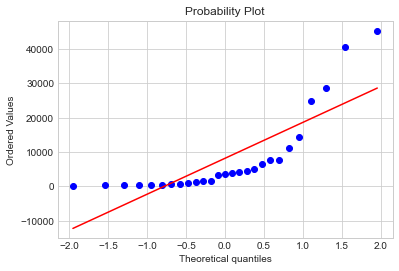

<Figure size 432x288 with 0 Axes>

In [19]:
#Normality plot. Our variable is "Variable_Urban_Rural"
df_pop20 = df_pop[(df_pop.Year ==2020)]
pystats.probplot(df_pop20.Variable_Urban_Rural_K, plot=plt)
plt.savefig("Normality plot1.png")
plt.figure()

In [20]:
df_pop20

,Area,Year,Female_K,Male_K,Rural_K,Urban_K,Variable_Urban_Rural_K,Total_K
5,Austria,2020,4524.926,4382.851,3622.850,5159.360,1536.510,8782.210
11,Belgium,2020,5854.453,5707.264,223.197,11396.775,11173.578,11619.972
17,Bulgaria,2020,3593.896,3385.278,1687.490,5253.037,3565.547,6940.527
23,Croatia,2020,2103.215,1993.655,1747.114,2368.833,621.719,4115.947
29,Cyprus,2020,617.605,619.932,400.589,806.754,406.165,1207.343
35,Czechia,2020,5343.468,5187.485,2758.156,7875.268,5117.112,10633.424
41,Denmark,2020,2928.360,2897.282,688.897,5107.903,4419.006,5796.800
47,Estonia,2020,699.604,629.841,400.194,900.365,500.171,1300.559
53,Finland,2020,2798.450,2731.017,808.148,4771.979,3963.831,5580.127
59,France,2020,33303.876,31176.177,12503.199,53217.966,40714.767,65721.165


In [21]:
#Shapiro wilk test

pystats.shapiro(df_pop.Variable_Urban_Rural_K[df_pop.Area == "Ireland"])

ShapiroResult(statistic=0.9757044315338135, pvalue=0.9283227920532227)

In [22]:
#Shapiro wilk test

pystats.shapiro(df_pop.Variable_Urban_Rural_K[df_pop.Area == "Croatia"])

ShapiroResult(statistic=0.9807613492012024, pvalue=0.9552789926528931)

In [23]:
#Shapiro wilk test

pystats.shapiro(df_pop.Variable_Urban_Rural_K[df_pop.Area == "Denmark"])

ShapiroResult(statistic=0.9838061928749084, pvalue=0.9688383340835571)

In [24]:
#Shapiro wilk test

pystats.shapiro(df_pop.Variable_Urban_Rural_K[df_pop.Area == "Luxembourg"])

ShapiroResult(statistic=0.9842236638069153, pvalue=0.9705241918563843)

In [25]:
#Shapiro wilk test

pystats.shapiro(df_pop.Variable_Urban_Rural_K[df_pop.Area == "Malta"])

ShapiroResult(statistic=0.9821272492408752, pvalue=0.9616302251815796)

In [26]:
#Shapiro wilk test

pystats.shapiro(df_pop.Variable_Urban_Rural_K[df_pop.Area == "Portugal"])

ShapiroResult(statistic=0.9814608693122864, pvalue=0.9585848450660706)

In [27]:
#Shapiro wilk test

pystats.shapiro(df_pop.Variable_Urban_Rural_K[df_pop.Area == "Germany"])

ShapiroResult(statistic=0.9773889183998108, pvalue=0.9378669857978821)

In [28]:
#Creat a new data frame For Population with Ireland and some other European contries for 2020.
df_pop20 = df_pop20[(df_pop.Area == "Ireland") | 
                    (df_pop.Area == "Croatia") |
                    (df_pop.Area == "Denmark") |
                    (df_pop.Area == "Luxembourg") |
                    (df_pop.Area == "Malta") |
                    (df_pop.Area == "Portugal") |
                    (df_pop.Area == "Germany") ]
print(df_pop20)

           Area  Year  Female_K      Male_K    Rural_K    Urban_K  \
23      Croatia  2020   2103.215   1993.655   1747.114   2368.833   
41      Denmark  2020   2928.360   2897.282    688.897   5107.903   
65      Germany  2020  42213.517  41115.471  18610.145  63930.305   
83      Ireland  2020   2495.802   2450.316   1776.656   3111.336   
107  Luxembourg  2020    313.197    317.202     51.616    552.328   
113       Malta  2020    248.447    266.911     22.830    411.533   
131    Portugal  2020   5438.319   4859.873   3442.606   6775.807   

     Variable_Urban_Rural_K    Total_K  
23                  621.719   4115.947  
41                 4419.006   5796.800  
65                45320.160  82540.450  
83                 1334.680   4887.992  
107                 500.712    603.944  
113                 388.703    434.363  
131                3333.201  10218.413  


In [29]:
#Creat a new data frame For Population with Ireland and some other European contries.
df_pop_sp = df_pop[(df_pop.Area == "Ireland") | 
                    (df_pop.Area == "Croatia") |
                    (df_pop.Area == "Denmark") |
                    (df_pop.Area == "Luxembourg") |
                    (df_pop.Area == "Malta") |
                    (df_pop.Area == "Portugal") |
                    (df_pop.Area == "Germany") ]
print(df_pop_sp)

           Area  Year  Female_K      Male_K    Rural_K    Urban_K  \
18      Croatia  2015   2196.249   2058.566   1857.290   2378.726   
19      Croatia  2016   2177.865   2045.886   1836.858   2376.407   
20      Croatia  2017   2159.300   2033.167   1815.373   2373.980   
21      Croatia  2018   2140.352   2020.133   1793.077   2371.706   
22      Croatia  2019   2122.252   2007.499   1770.247   2369.901   
23      Croatia  2020   2103.215   1993.655   1747.114   2368.833   
36      Denmark  2015   2858.620   2819.175    709.587   4979.108   
37      Denmark  2016   2872.189   2834.668    705.862   5006.008   
38      Denmark  2017   2886.493   2850.791    701.971   5031.580   
39      Denmark  2018   2900.363   2866.323    697.769   5056.587   
40      Denmark  2019   2914.173   2881.706    693.384   5081.840   
41      Denmark  2020   2928.360   2897.282    688.897   5107.903   
60      Germany  2015  41637.850  40435.376  18629.376  63078.413   
61      Germany  2016  41741.679  

In [30]:
#Creat a new data frame for Production with Ireland and some other European contries.
df_prod_sp = df_prod[(df_prod.Area == "Ireland") | 
                   (df_prod.Area == "Croatia") |
                   (df_prod.Area == "Denmark") |
                   (df_prod.Area == "Luxembourg") |
                   (df_prod.Area == "Malta") |
                   (df_prod.Area == "Portugal") |
                   (df_prod.Area == "Germany") ]
df_prod_sp = df_prod_sp.rename(columns = {"Meat Cattle":"Meat_Cattle","Meat Pig":"Meat_Pig","Raw Milk":"Raw_Milk"})
print(df_prod_sp)

          Area  Year   Barley  Meat_Cattle  Meat_Pig  Raw_Milk
24     Denmark  2015   688336       393357   2429233   1921853
25     Denmark  2016   610185       397087   2625655   1906728
26     Denmark  2017   663882       410411   2903526   2479425
27     Denmark  2018   701078       453099   2585510   2542332
28     Denmark  2019   702147       388300   2982377   2343005
29     Denmark  2020   732549       372060   3546159   2456191
48     Germany  2015  1870174      4140318   8556203  10729326
49     Germany  2016  1495623      3966221   9213011   9830616
50     Germany  2017  1667490      4131199  10150354  12925856
51     Germany  2018  1873095      4475172   9022256  13793128
52     Germany  2019  2035995      4020154  10185481  12739152
53     Germany  2020  1848525      3976200  11000930  12500674
65     Ireland  2015   352333      2689100    802155   2010371
66     Ireland  2016   375665      2700582    839628   1904758
67     Ireland  2017   506004      2917414    959746   

In [31]:
df_pop_sp["Area"].value_counts()

Croatia       6
Denmark       6
Germany       6
Ireland       6
Luxembourg    6
Malta         6
Portugal      6
Name: Area, dtype: int64

In [32]:
#Organize New data frame by contry

df_Ireland = df_pop_sp.Variable_Urban_Rural_K[df_pop_sp.Area =="Ireland"]
df_Croatia = df_pop_sp.Variable_Urban_Rural_K[df_pop_sp.Area =="Croatia"]
df_Denmark = df_pop_sp.Variable_Urban_Rural_K[df_pop_sp.Area =="Denmark"]
df_Luxembourg = df_pop_sp.Variable_Urban_Rural_K[df_pop_sp.Area =="Luxembourg"]
df_Malta = df_pop_sp.Variable_Urban_Rural_K[df_pop_sp.Area =="Malta"]
df_Portugal = df_pop_sp.Variable_Urban_Rural_K[df_pop_sp.Area =="Portugal"]
df_Germany = df_pop_sp.Variable_Urban_Rural_K[df_pop_sp.Area =="Germany"]

In [33]:
sd1 = df_Ireland.std()
sd1

58.87004086092227

In [34]:
sd2 = df_Croatia.std()
sd2

37.534444957487516

In [35]:
sd3 = df_Denmark.std()
sd3

55.67549049866255

In [36]:
sd4 = df_Luxembourg.std()
sd4

16.797980612760153

In [37]:
sd5 = df_Malta.std()
sd5

3.293943877279431

In [38]:
sd6 = df_Portugal.std()
sd6

193.7071231332669

In [39]:
sd7 = df_Germany.std()
sd7

328.6764485760543

In [40]:
#Homogeinity of variance: Levene's test

from scipy.stats import levene

In [41]:
levene(df_Ireland, df_Croatia, df_Denmark, df_Luxembourg, df_Malta, df_Portugal, df_Germany, center = "mean")

LeveneResult(statistic=11.21412010639353, pvalue=5.838042277091072e-07)

In [42]:
#ONE-WAY ANOVA
model = ols("Variable_Urban_Rural_K~Area", data = df_pop_sp).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

            df        sum_sq       mean_sq             F        PR(>F)
Area       6.0  9.673401e+09  1.612234e+09  73370.073284  3.254386e-70
Residual  35.0  7.690898e+05  2.197399e+04           NaN           NaN


In [43]:
#H0 = means are equal
#H1 = means are not equal

# Descriptive Population

In [44]:
df_pop.head()

,Area,Year,Female_K,Male_K,Rural_K,Urban_K,Variable_Urban_Rural_K,Total_K
0,Austria,2015,4406.012,4236.408,3669.727,5008.930,1339.203,8678.657
1,Austria,2016,4444.016,4292.470,3667.377,5044.760,1377.383,8712.137
2,Austria,2017,4472.011,4325.485,3660.707,5074.746,1414.039,8735.453
3,Austria,2018,4492.710,4347.802,3649.748,5102.072,1452.324,8751.820
4,Austria,2019,4511.992,4367.948,3636.627,5129.574,1492.947,8766.201


In [45]:
df_pop.describe()

,Year,Female_K,Male_K,Rural_K,Urban_K,Variable_Urban_Rural_K,Total_K
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,2017.500000,8416.395802,8029.845204,4202.020821,12201.796191,7999.775370,16403.817012
std,1.713121,11055.504251,10572.188643,5507.851914,16515.867099,11888.720843,21561.050860
min,2015.000000,225.920000,230.659000,22.830000,403.728000,156.904000,427.616000
25%,2016.000000,1577.235750,1363.960000,706.793250,1962.161000,605.170250,2914.168250
50%,2017.500000,4482.360500,4336.643500,1772.022500,5284.081000,3507.452500,8743.636500
75%,2019.000000,8620.210500,8483.445250,3658.356500,11103.565250,7657.203500,16975.122250
max,2020.000000,42213.517000,41115.471000,18672.100000,63930.305000,45320.160000,82540.450000


In [46]:
mean_total = df_pop["Total_K"].mean()
print(mean_total)

16403.817012345673


In [47]:
median_total = df_pop["Total_K"].median()
print(median_total)

8743.6365


In [48]:
std_total = df_pop["Total_K"].std()
print(std_total)

21561.05085964443


In [49]:
max_total = df_pop["Total_K"].max()
print(max_total)

82540.45


In [50]:
mode_total = df_pop["Total_K"].mode()
print(mode_total)

0        427.616
1        429.362
2        430.835
3        432.089
4        433.245
         ...    
157    81914.672
158    82114.224
159    82293.457
160    82438.639
161    82540.450
Name: Total_K, Length: 162, dtype: float64


[Text(0.5, 0, 'Variable of Population between 2015 to 2020 urban to Rural'),
 Text(0, 0.5, ' '),
 Text(0.5, 1.0, 'Population European')]

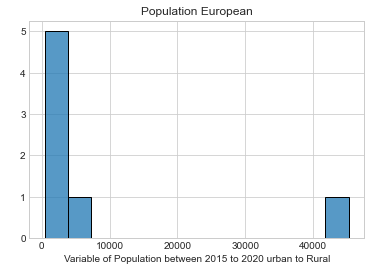

In [51]:
ax = sns.histplot(df_pop20.Variable_Urban_Rural_K)
ax.set(xlabel = "Variable of Population between 2015 to 2020 urban to Rural", ylabel = " ", title = "Population European")

[Text(0.5, 0, 'Variable of Population between 2015 to 2020 urban to Rural'),
 Text(0, 0.5, ' '),
 Text(0.5, 1.0, 'Population European')]

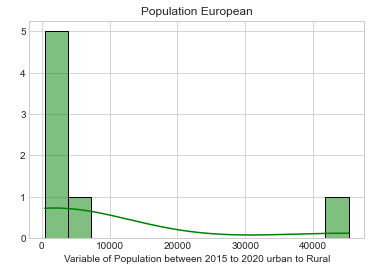

In [52]:
ax = sns.histplot(df_pop20.Variable_Urban_Rural_K, kde=True, color ='green')
ax.set(xlabel = "Variable of Population between 2015 to 2020 urban to Rural", ylabel = " ", title = "Population European")

In [53]:
df_locations = df_pop20.groupby("Area", axis =0).sum()
df_locations

,Year,Female_K,Male_K,Rural_K,Urban_K,Variable_Urban_Rural_K,Total_K
Area,,,,,,,
Croatia,2020,2103.215,1993.655,1747.114,2368.833,621.719,4115.947
Denmark,2020,2928.360,2897.282,688.897,5107.903,4419.006,5796.800
Germany,2020,42213.517,41115.471,18610.145,63930.305,45320.160,82540.450
Ireland,2020,2495.802,2450.316,1776.656,3111.336,1334.680,4887.992
Luxembourg,2020,313.197,317.202,51.616,552.328,500.712,603.944
Malta,2020,248.447,266.911,22.830,411.533,388.703,434.363
Portugal,2020,5438.319,4859.873,3442.606,6775.807,3333.201,10218.413


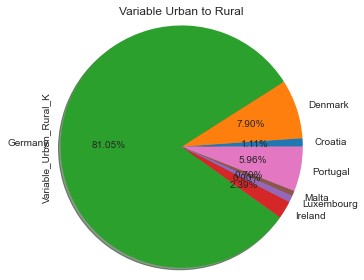

In [54]:
df_locations["Variable_Urban_Rural_K"].plot(kind="pie", radius=1.2, autopct="%1.2f%%", shadow = True)
plt.title("Variable Urban to Rural") #Ireland, Creatia, Denmark, Luxembourg, Malta, Portugal, Germany
plt.tight_layout()
plt.savefig("Variable_Urban_And_Rural.png")

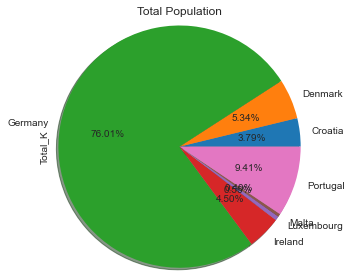

In [55]:
df_locations["Total_K"].plot(kind="pie", radius=1.2, autopct="%1.2f%%", shadow = True)
plt.title("Total Population") #Ireland, Creatia, Denmark, Luxembourg, Malta, Portugal, Germany
plt.tight_layout()
plt.savefig("Total of Population.png")

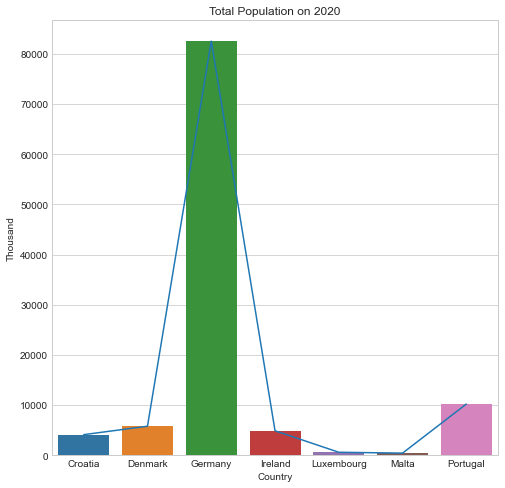

In [56]:
# Total Population on Ireland, Creatia, Denmark, Luxembourg, Malta, Portugal, Germany from 2015 to 2020.
y = (df_pop20.Total_K)
x = (df_pop20.Area)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y)
ap = sns.barplot(x="Area", y="Total_K", data=df_pop20, estimator=sum)
ap.set(xlabel = "Country", ylabel="Thousand", title = "Total Population on 2020")
fig.set_size_inches(8,8)
plt.savefig("Population1.png")
plt.show()


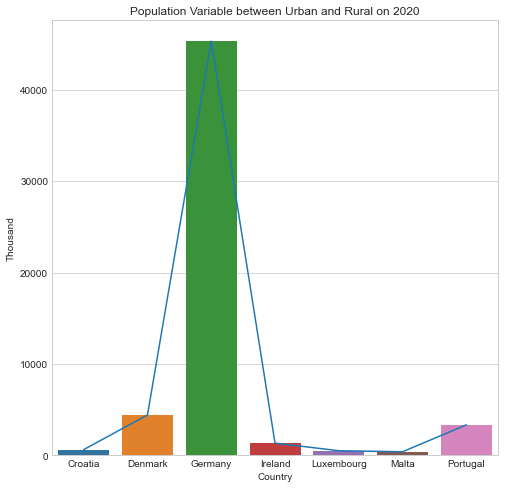

In [57]:
# Total Population on Ireland, Creatia, Denmark, Luxembourg, Malta, Portugal, Germany from 2015 to 2020.
y = (df_pop20.Variable_Urban_Rural_K)
x = (df_pop20.Area)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y)
ap = sns.barplot(x="Area", y="Variable_Urban_Rural_K", data=df_pop20, estimator=sum)
ap.set(xlabel = "Country", ylabel="Thousand", title = "Population Variable between Urban and Rural on 2020")
fig.set_size_inches(8,8)
plt.savefig("Population2.png")
plt.show()

In [58]:
#Ireland, Creatia "NA", Denmark, Luxembourg, Malta, Portugal "NA", Germany
df_production = df_prod_sp.groupby("Area", axis =0).sum()
df_production

,Year,Barley,Meat_Cattle,Meat_Pig,Raw_Milk
Area,,,,,
Denmark,12105,4098177,2414314,17072460,13649534
Germany,12105,10790902,24709264,58128235,72518752
Ireland,12105,2747335,16143190,5398796,16108881
Luxembourg,12105,33265,247730,143800,881257
Malta,6048,6094,10175,37336,82320


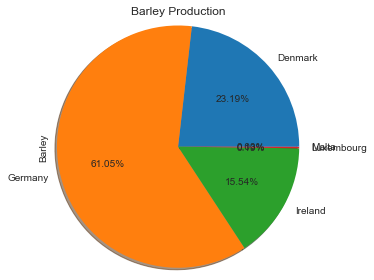

In [59]:
df_production["Barley"].plot(kind="pie", radius=1.2, autopct="%1.2f%%", shadow = True)
plt.title("Barley Production") #Ireland, Creatia "NA", Denmark, Luxembourg, Malta, Portugal "NA", Germany
plt.tight_layout()
plt.savefig("Barley Production1.png")

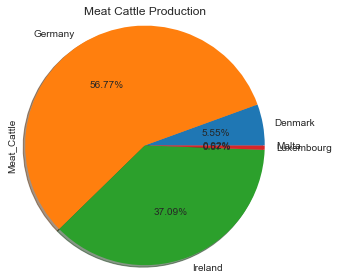

In [60]:
df_production["Meat_Cattle"].plot(kind="pie", radius=1.2, autopct="%1.2f%%", shadow = True)
plt.title("Meat Cattle Production") #Ireland, Creatia "NA", Denmark, Luxembourg, Malta, Portugal "NA", Germany
plt.tight_layout()
plt.savefig("Meat Cattle Production1.png")

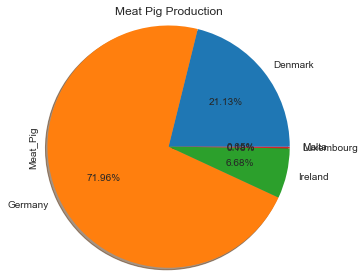

In [61]:
df_production["Meat_Pig"].plot(kind="pie", radius=1.2, autopct="%1.2f%%", shadow = True)
plt.title("Meat Pig Production") #Ireland, Creatia "NA", Denmark, Luxembourg, Malta, Portugal "NA", Germany
plt.tight_layout()
plt.savefig("Meat Pig Production1.png")

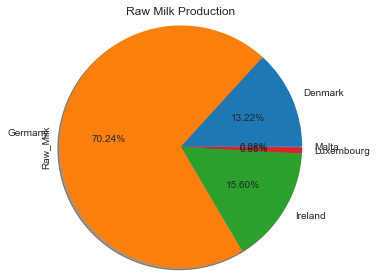

In [62]:
df_production["Raw_Milk"].plot(kind="pie", radius=1.2, autopct="%1.2f%%", shadow = True)
plt.title("Raw Milk Production") #Ireland, Creatia "NA", Denmark, Luxembourg, Malta, Portugal "NA", Germany
plt.tight_layout()
plt.savefig("Raw Milk Production1.png")

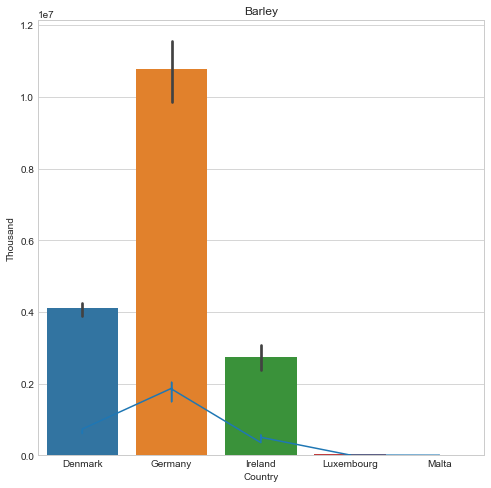

In [63]:
# Production of Barley on Ireland, "Creatia NA", Denmark, Luxembourg, Malta, "Portugal NA" and Germany from 2015 to 2020.
y = (df_prod_sp.Barley)
x = (df_prod_sp.Area)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y)
ap = sns.barplot(x="Area", y="Barley", data=df_prod_sp, estimator=sum)
ap.set(xlabel = "Country", ylabel="Thousand", title = "Barley")
fig.set_size_inches(8,8)
plt.savefig("Production Barley.png")
plt.show()

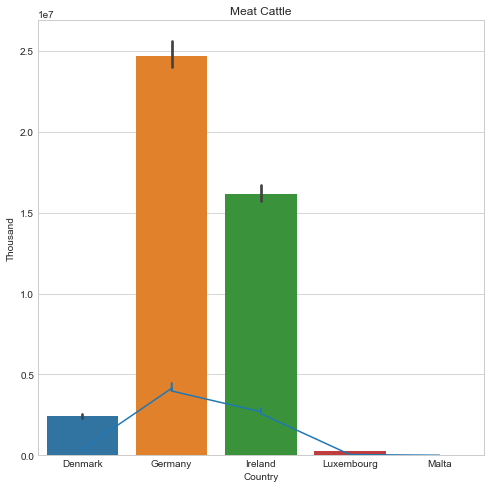

In [64]:
# Production of Meat Cattle on Ireland, "Creatia NA", Denmark, Luxembourg, Malta, "Portugal NA" and Germany from 2015 to 2020.
y = (df_prod_sp.Meat_Cattle)
x = (df_prod_sp.Area)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y)
ap = sns.barplot(x="Area", y="Meat_Cattle", data=df_prod_sp, estimator=sum)
ap.set(xlabel = "Country", ylabel="Thousand", title = "Meat Cattle")
fig.set_size_inches(8,8)
plt.savefig("Production Meat Cattle.png")
plt.show()

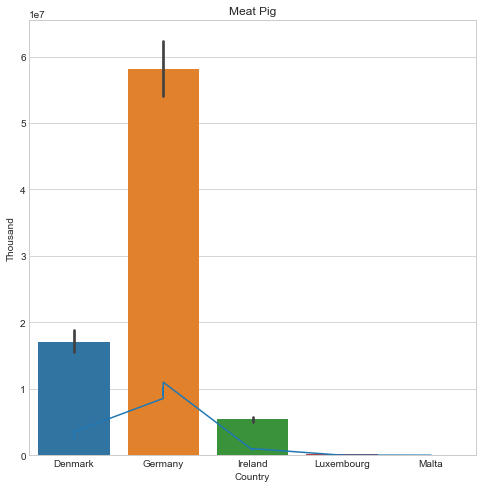

In [65]:
# Production of Meat Pig on Ireland, "Creatia NA", Denmark, Luxembourg, Malta, "Portugal NA" and Germany from 2015 to 2020.
y = (df_prod_sp.Meat_Pig)
x = (df_prod_sp.Area)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y)
ap = sns.barplot(x="Area", y="Meat_Pig", data=df_prod_sp, estimator=sum)
ap.set(xlabel = "Country", ylabel="Thousand", title = "Meat Pig")
fig.set_size_inches(8,8)
plt.savefig("Production Meat Pig.png")
plt.show()

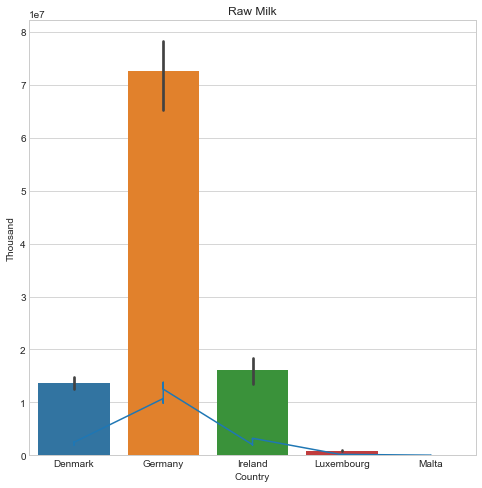

In [66]:
# Production of Raw Milk on Ireland, "Creatia NA", Denmark, Luxembourg, Malta, "Portugal NA" and Germany from 2015 to 2020.
y = (df_prod_sp.Raw_Milk)
x = (df_prod_sp.Area)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y)
ap = sns.barplot(x="Area", y="Raw_Milk", data=df_prod_sp, estimator=sum)
ap.set(xlabel = "Country", ylabel="Thousand", title = "Raw Milk")
fig.set_size_inches(8,8)
plt.savefig("Production Raw Milk.png")
plt.show()

# PCA and Clustering

In [67]:
# Install this library
#!pip install PCA
#%matplotlib inline
from preamble import *

In [68]:
df_prod20 = df_prod[(df_prod.Year == 2020)] 
df_prod20.head()

,Area,Year,Barley,Meat Cattle,Meat Pig,Raw Milk
5,Austria,2020,114589,909298,1000011,1642972
11,Bulgaria,2020,94857,39775,140466,351305
17,Cyprus,2020,9034,13403,94324,186749
23,Czechia,2020,341714,244797,380506,1204725
29,Denmark,2020,732549,372060,3546159,2456191


In [69]:
df_prod20.drop(["Area","Year"], axis=1, inplace=True)
df_prod20.head()

,Barley,Meat Cattle,Meat Pig,Raw Milk
5,114589,909298,1000011,1642972
11,94857,39775,140466,351305
17,9034,13403,94324,186749
23,341714,244797,380506,1204725
29,732549,372060,3546159,2456191


In [70]:
# distributing the dataset into two components X and Y
X = df_prod20.iloc[:, 0:160].values
y = df_prod20.iloc[:, 3].values

In [71]:
# Splitting the X and Y into the Training set and Testing set
from sklearn.model_selection import train_test_split

# Split the data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [72]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler

# Create and initialise an object (sc) by calling a method named as StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transform the data into standised form
X_test = sc.transform(X_test)

In [73]:
# Applying PCA function on trainingv and testing set of X component
from sklearn.decomposition import PCA

# Create and initialise an object (pca) by calling a method PCA
pca = PCA(n_components = 2)

# Transform the data into traning and testing
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
# Store the explauned variance
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.811 0.166]


# PCA for Machine Learning Model

In [74]:
# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer
  
# creating dataframe
df_pca_mlm = df_prod20

# checking head of dataframe
df_pca_mlm.head()

,Barley,Meat Cattle,Meat Pig,Raw Milk
5,114589,909298,1000011,1642972
11,94857,39775,140466,351305
17,9034,13403,94324,186749
23,341714,244797,380506,1204725
29,732549,372060,3546159,2456191


In [75]:
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()
  
# fitting
scalar.fit(df_pca_mlm)
scaled_data = scalar.transform(df_pca_mlm)
  
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
x_pca.shape

(19, 2)

Text(0, 0.5, 'Second Principal Component')

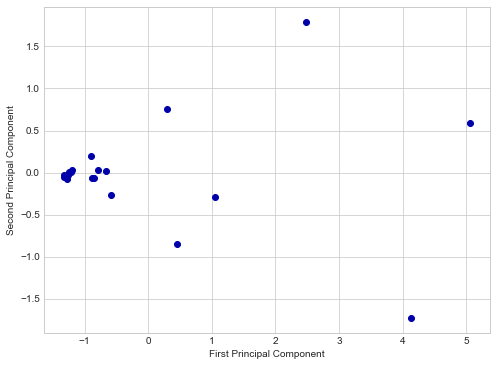

In [76]:
# giving a larger plot
plt.figure(figsize =(8, 6))
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], cmap ='plasma')
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

<AxesSubplot:>

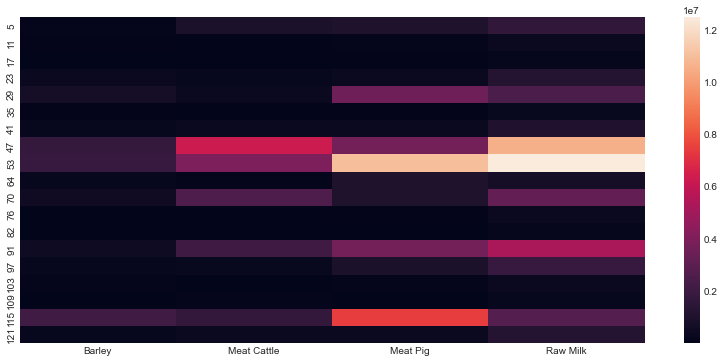

In [77]:
df_comp = df_prod20
  
plt.figure(figsize =(14, 6))
  
# plotting heatmap
sns.heatmap(df_comp)

# Statistics and Appropriate plots

## Boxplot per year

<AxesSubplot:>

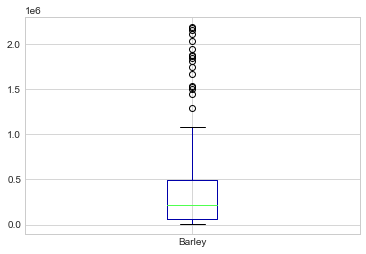

In [78]:
#Boxplot
df_prod[["Barley"]].boxplot()

<AxesSubplot:>

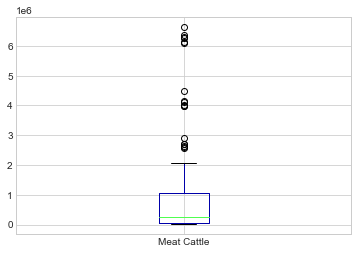

In [79]:
#Boxplot
df_prod[["Meat Cattle"]].boxplot()

<AxesSubplot:>

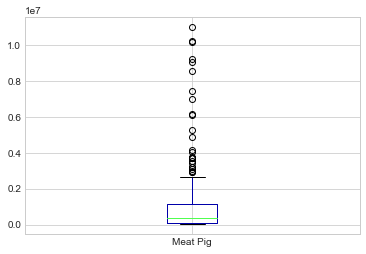

In [80]:
#Boxplot
df_prod[["Meat Pig"]].boxplot()

<AxesSubplot:>

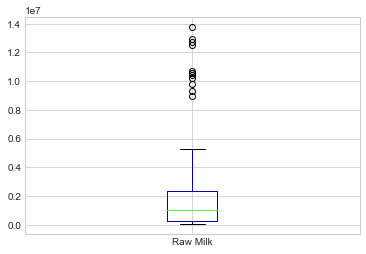

In [81]:
#Boxplot
df_prod[["Raw Milk"]].boxplot()

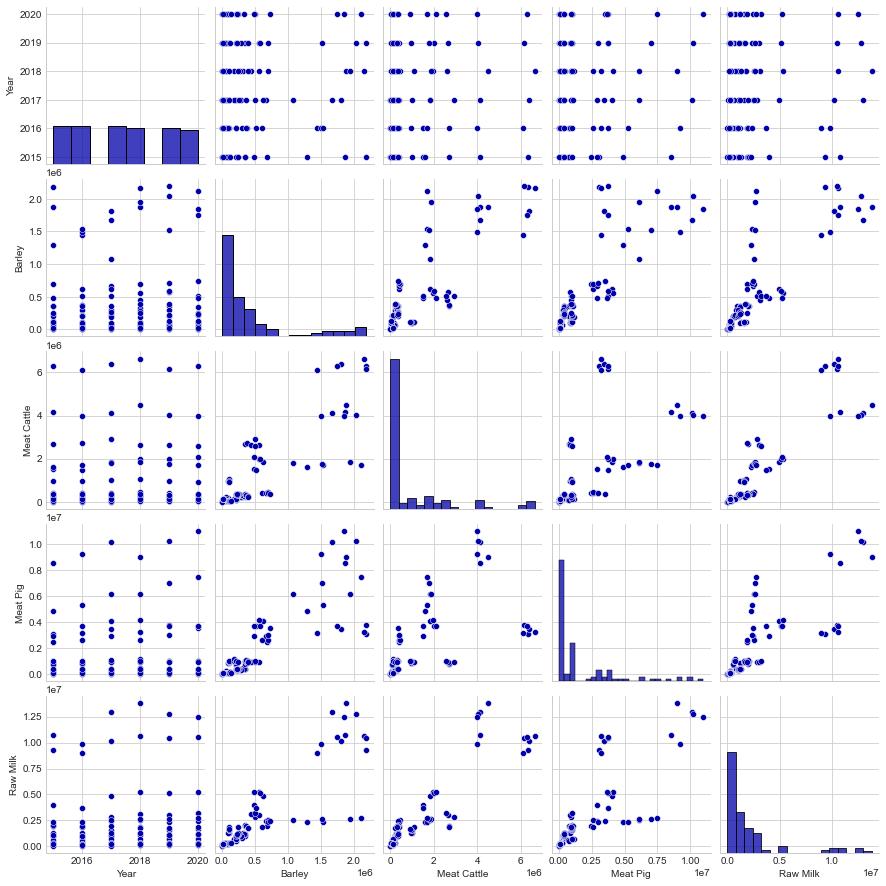

In [82]:
sns.pairplot(df_prod)
plt.savefig("pairplot all production.png");

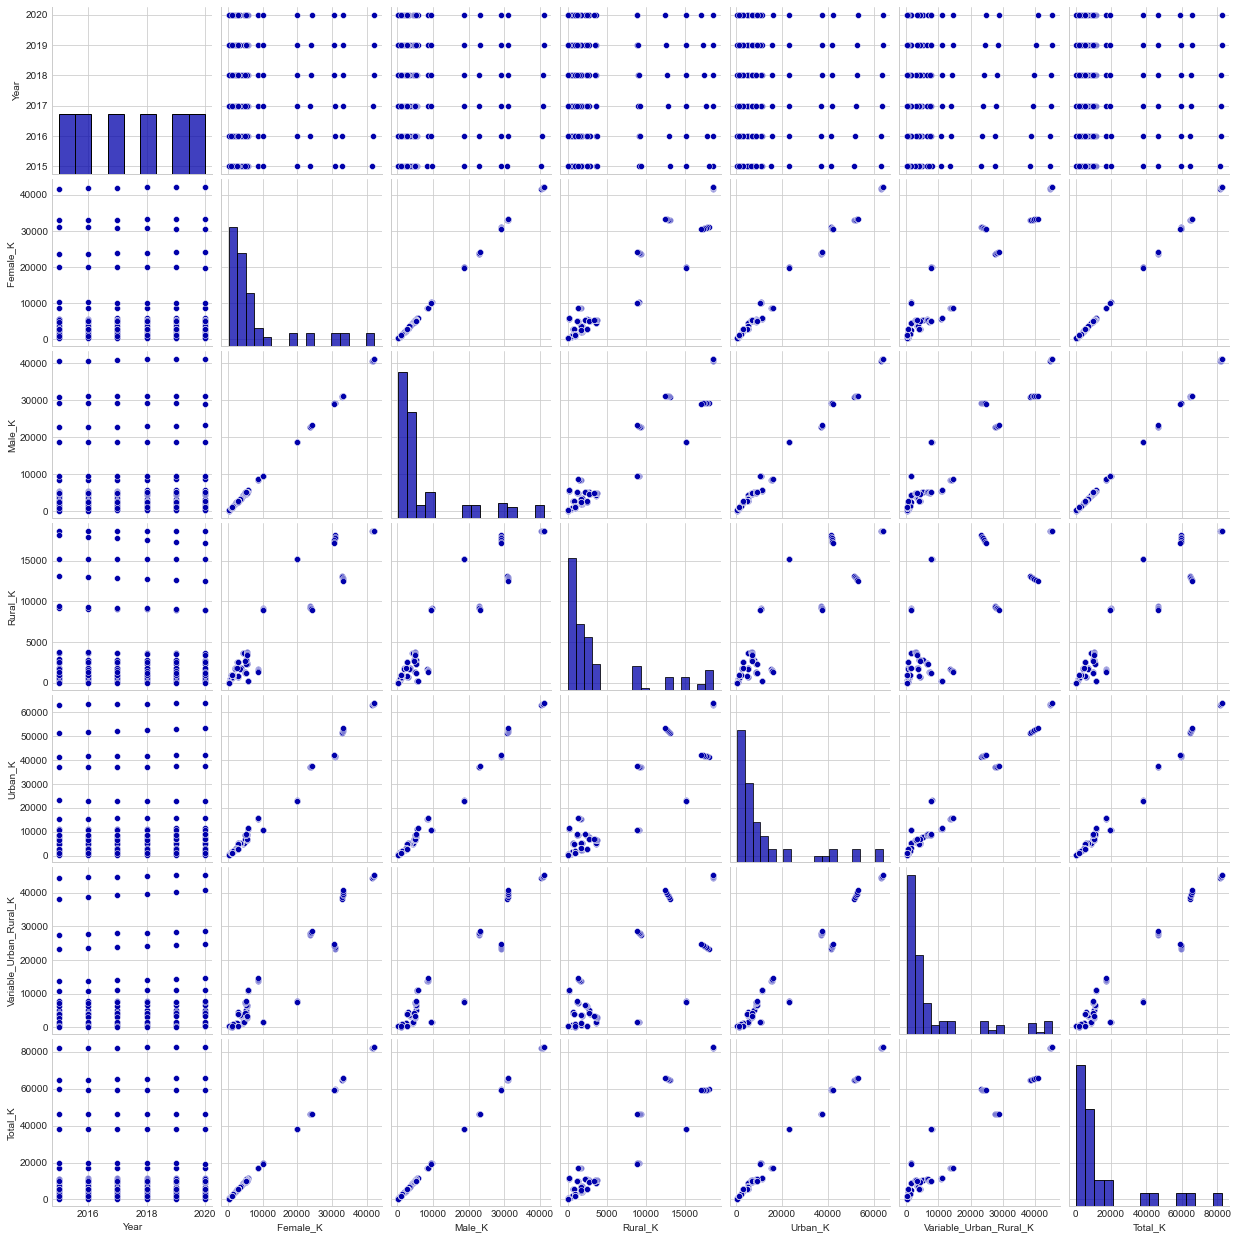

In [83]:
sns.pairplot(df_pop)
plt.savefig("pairplot all population.png");

# Decision Trees and Random Forest

In [94]:
df_prod_dtr = df_prod[(df_prod.Year == 2020)] 
df_prod_dtr.drop(["Year"], axis=1, inplace=True)
df_prod_dtr

,Area,Barley,Meat Cattle,Meat Pig,Raw Milk
5,Austria,114589,909298,1000011,1642972
11,Bulgaria,94857,39775,140466,351305
17,Cyprus,9034,13403,94324,186749
23,Czechia,341714,244797,380506,1204725
29,Denmark,732549,372060,3546159,2456191
35,Estonia,93611,22883,85049,271551
41,Finland,221949,319484,328741,1077497
47,France,1742798,6276773,3703520,10581038
53,Germany,1848525,3976200,11000930,12500674
64,Hungary,214616,104119,1020913,696933


In [108]:
df_prod_dtr.drop(["Meat Cattle", "Meat Pig", "Raw Milk"], axis=1, inplace=True)
df_prod_dtr

,Area,Barley
5,Austria,114589
11,Bulgaria,94857
17,Cyprus,9034
23,Czechia,341714
29,Denmark,732549
35,Estonia,93611
41,Finland,221949
47,France,1742798
53,Germany,1848525
64,Hungary,214616


In [117]:
X = df_prod_dtr.iloc[:, [1,5]].values

# Store the 'Array' feature into 'y'
y = df_prod_dtr.iloc[:, -1].values

# Display X and y 
X, y

IndexError: positional indexers are out-of-bounds

In [ ]:
# Load the library 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Load the library 'sklearn.preprocessing'
from sklearn.preprocessing import StandardScaler

# Create and initialise an object by calling a method 'StandardScaler()'
sc = StandardScaler()

# Convert the X_train and X_test into standised format
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Display the trandofrmed values
X_train, X_test

In [ ]:
# Load the library 'sklearn.tree'
from sklearn.tree import DecisionTreeClassifier

# Create and initialise a DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 5, random_state = 0)

# Train the classifier by calling a method 'fit()'
classifier.fit(X_train, y_train)

In [ ]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))